In [1]:
# just playing around for now
import numpy as np
import h5py
import hdf5plugin

# Reading and Manipulating Snapshots

In [2]:
f_snap = '/home/jovyan/Data/Sims/IllustrisTNG/CV/CV_0/snap_033.hdf5'
data = h5py.File(f_snap, 'r')

In [3]:
data

<HDF5 file "snap_033.hdf5" (mode r)>

In [4]:
BoxSize      = data['Header'].attrs[u'BoxSize']/1e3    #size of the snapshot in comoving Mpc/h
redshift     = data['Header'].attrs[u'Redshift']       #reshift of the snapshot
scale_factor = data['Header'].attrs[u'Time']           #scale factor
h            = data['Header'].attrs[u'HubbleParam']    #value of the hubble parameter in 100 km/s/(Mpc/h)
Masses       = data['Header'].attrs[u'MassTable']*1e10 #masses of the particles in Msun/h
Np           = data['Header'].attrs[u'NumPart_Total']  #total number of particles for specie
Omega_m      = data['Header'].attrs[u'Omega0']         #Omega_matter
Omega_L      = data['Header'].attrs[u'OmegaLambda']    #Omega_Lambda
Omega_b      = data['Header'].attrs[u'OmegaBaryon']    #Omega_baryon
print('Box size:                 %.2f Mpc/h'%BoxSize)
print('snapshot redshift:        %.2f'%redshift)
print('Number of gas  particles: %d'%Np[0])
print('Number of star particles: %d'%Np[4])
print('Omega_m:                  %.3f'%Omega_m)
print('Omega_b:                  %.3f'%Omega_b)
print('Omega_L:                  %.3f'%Omega_L)


Box size:                 25.00 Mpc/h
snapshot redshift:        0.00
Number of gas  particles: 15695635
Number of star particles: 636474
Omega_m:                  0.300
Omega_b:                  0.049
Omega_L:                  0.700


In [5]:
pos_gas   = data['PartType0/Coordinates'][:]/1e3 #Mpc/h
pos_dm    = data['PartType1/Coordinates'][:]/1e3 #Mpc/h
pos_stars = data['PartType4/Coordinates'][:]/1e3 #Mpc/h
pos_bh    = data['PartType5/Coordinates'][:]/1e3 #Mpc/h
print('%.2f < pos_gas_X < %.2f'%(np.min(pos_gas[:,0]), np.max(pos_gas[:,0])))
print('%.2f < pos_gas_Y < %.2f'%(np.min(pos_gas[:,1]), np.max(pos_gas[:,1])))
print('%.2f < pos_gas_Z < %.2f'%(np.min(pos_gas[:,2]), np.max(pos_gas[:,2])))

0.00 < pos_gas_X < 25.00
0.00 < pos_gas_Y < 25.00
0.00 < pos_gas_Z < 25.00


In [6]:
print('Number of star particles: %d'%pos_stars.shape[0])

Number of star particles: 636474


# Computing Power Spectra

In [7]:
import MAS_library as MASL
import Pk_library as PKL
import matplotlib.pylab as plt

In [8]:
#Get the name of the snapshot & open the snapshot file
f_snap = '/home/jovyan/Data/Sims/SIMBA/LH/LH_367/snap_020.hdf5'
data = h5py.File(f_snap, 'r')

#Read the snapshot header
BoxSize      = data['Header'].attrs[u'BoxSize']/1e3    #size of the snapshot in comoving Mpc/h
redshift     = data['Header'].attrs[u'Redshift']       #reshift of the snapshot
scale_factor = data['Header'].attrs[u'Time']           #scale factor
h            = data['Header'].attrs[u'HubbleParam']    #value of the hubble parameter in 100 km/s/(Mpc/h)
Masses       = data['Header'].attrs[u'MassTable']*1e10 #masses of the particles in Msun/h
Np           = data['Header'].attrs[u'NumPart_Total']  #total number of particles for specie
Omega_m      = data['Header'].attrs[u'Omega0']         #Omega_matter
Omega_L      = data['Header'].attrs[u'OmegaLambda']    #Omega_Lambda

In [9]:
f = h5py.File(f_snap, 'r')
header = f['Header']
print(list(header.attrs.items()))  


[('BoxSize', 25000.0), ('CompactLevel', 0), ('Flag_Cooling', 1), ('Flag_DoublePrecision', 0), ('Flag_Feedback', 1), ('Flag_IC_Info', 3), ('Flag_Metals', 11), ('Flag_Sfr', 1), ('Flag_StellarAge', 1), ('HubbleParam', 0.6711), ('MassTable', array([0., 0., 0., 0., 0., 0.])), ('NumFilesPerSnapshot', 1), ('NumPart_ThisFile', array([16131065, 16777216,        0,        0,   646066,      330],
      dtype=uint32)), ('NumPart_Total', array([16131065, 16777216,        0,        0,   646066,      330],
      dtype=uint32)), ('NumPart_Total_HighWord', array([0, 0, 0, 0, 0, 0], dtype=uint32)), ('Omega0', 0.3614), ('OmegaLambda', 0.6386), ('Redshift', 0.8616111131442525), ('Time', 0.5371691181575536)]


In [10]:
#Read the positions and the masses of the gas particles
pos_gas   = data['PartType0/Coordinates'][:]/1e3 #Mpc/h
mass_gas  = data['PartType0/Masses'][:]*1e10     #Msun/h

print('Box size: %.2f Mpc/h'%BoxSize)
print('Snapshot redshift: %.2f'%redshift)

#Check the masses positions and masses of the gas particles
print('%.2f < pos_gas_X < %.2f'%(np.min(pos_gas[:,0]), np.max(pos_gas[:,0])))
print('%.3e < mass_gas  < %.3e'%(np.min(mass_gas), np.max(mass_gas)))

Box size: 25.00 Mpc/h
Snapshot redshift: 0.86
0.00 < pos_gas_X < 25.00
1.219e+07 < mass_gas  < 3.811e+07


In [11]:
pos_gas = pos_gas.astype(np.float32)
pos_gas

array([[11.910932 ,  2.4071898, 10.493294 ],
       [11.910544 ,  2.4084978, 10.493123 ],
       [11.911214 ,  2.4077013, 10.493524 ],
       ...,
       [ 8.563431 ,  1.3449534, 12.502229 ],
       [ 8.562852 ,  1.3463528, 12.500363 ],
       [ 8.5624075,  1.3465213, 12.500114 ]], dtype=float32)

In [12]:
#Make sure the positions are a numpy float32 array
mass_gas = mass_gas.astype(np.float32)
mass_gas

array([12908462., 14908063., 14456040., ..., 18142882., 15884560.,
       18959076.], dtype=float32)

In [13]:
# Define array the will contain the gas density field
grid  = 512
delta = np.zeros((grid,grid,grid), dtype=np.float32) #grid will have (512,512,512) voxels (voxel represents a value on a regular grid in three-dimensional space)
delta

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [14]:
#Assign gas particle positions and masses to the regular grid
#We will use the Cloud-in-Cell mass assignment scheme
MAS     = 'CIC'
verbose = True
MASL.MA(pos_gas, delta, BoxSize, MAS, W=mass_gas, verbose=verbose)


Using CIC mass assignment scheme with weights
Time taken = 1.504 seconds



In [15]:
#Check that the mass in the grid is the same as the mass of all particles
print('Sum of all particle masses:         %.3e Msun/h'%np.sum(mass_gas, dtype=np.float64))
print('Sum of the mass in all grid voxels: %.3e Msun/h'%np.sum(delta, dtype=np.float64))

Sum of all particle masses:         2.062e+14 Msun/h
Sum of the mass in all grid voxels: 2.062e+14 Msun/h


In [16]:
#calculate the gas overdensity field delta = mass_gas / < mass_gas > - 1 # dont understand this

In [17]:
delta /= np.mean(delta, dtype=np.float32)
delta -= 1.0

In [18]:
#Check that mean is zero, and minimum cant be smaller than -1

print('%.2f < delta < %.2f'%(np.min(delta), np.max(delta)))
print('< delta > = %.2e'%(np.mean(delta, dtype=np.float64)))

-1.00 < delta < 11278.17
< delta > = -2.41e-06


In [19]:
# Calculate the power spectrum
axis     = 0     #specifies the axes along which redshift-space distortions are place. Not used in real-space
MAS      = 'CIC' #specifies the mass assignment scheme used to construct the density field
threads  = 1     #number of openmp threads
verbose  = True
Pk_class = PKL.Pk(delta, BoxSize, axis, MAS, threads, verbose)
k        = Pk_class.k3D
Pk       = Pk_class.Pk[:,0]


Computing power spectrum of the field...
Time to complete loop = 7.31
Time taken = 11.12 seconds


In [20]:
print('Power Spectrum:', Pk)

Power Spectrum: [2.16683975e+02 6.75897702e+01 2.97423461e+01 1.60306239e+01
 1.02442075e+01 7.67192413e+00 5.38960065e+00 4.22063030e+00
 3.80178092e+00 2.75837005e+00 2.34117373e+00 1.99379176e+00
 1.72922866e+00 1.51067963e+00 1.24431703e+00 1.12591934e+00
 9.91339104e-01 9.34379892e-01 8.11665810e-01 7.40587069e-01
 6.81014616e-01 6.32794192e-01 5.74828235e-01 5.26017374e-01
 4.92666086e-01 4.52098226e-01 4.26216728e-01 3.99619274e-01
 3.73181625e-01 3.46710354e-01 3.32460024e-01 3.20559026e-01
 2.92546573e-01 2.80723237e-01 2.72881034e-01 2.55513703e-01
 2.39245938e-01 2.32602723e-01 2.23439351e-01 2.14402402e-01
 2.05827703e-01 2.01404125e-01 1.90737672e-01 1.83703916e-01
 1.76783740e-01 1.72020571e-01 1.67483976e-01 1.59264590e-01
 1.53366322e-01 1.47511996e-01 1.43999780e-01 1.39749569e-01
 1.35604446e-01 1.31460768e-01 1.29313580e-01 1.23782664e-01
 1.20391065e-01 1.18567753e-01 1.14190036e-01 1.11570026e-01
 1.08444524e-01 1.06506237e-01 1.04391560e-01 1.01325355e-01
 9.94186

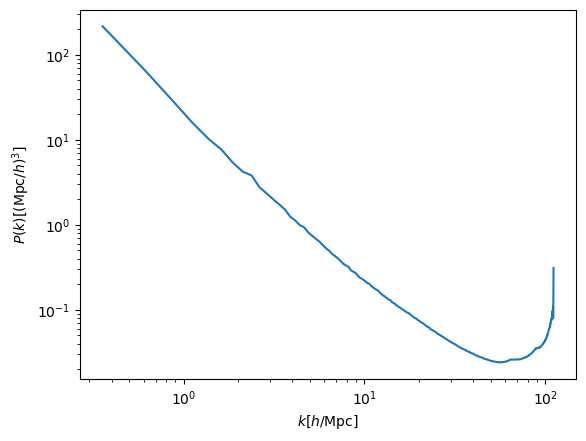

In [21]:
plt.xlabel(r'$k [h/{\rm Mpc}]$')
plt.ylabel(r'$P(k) [({\rm Mpc}/h)^3]$')
plt.xscale('log')
plt.yscale('log')
plt.plot(k, Pk)
plt.show()

# Creating images from snapshots

In [22]:
import numpy as np
import h5py
import hdf5plugin
import camels_library as CL
import MAS_library as MASL
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [23]:
f_snap = '/home/jovyan/Data/Sims/IllustrisTNG/1P/1P_1_3/snap_033.hdf5'


In [24]:
data         = h5py.File(f_snap, 'r')
BoxSize      = data['Header'].attrs[u'BoxSize']/1e3    #size of the snapshot in comoving Mpc/h
redshift     = data['Header'].attrs[u'Redshift']       #reshift of the snapshot
scale_factor = data['Header'].attrs[u'Time']           #scale factor
h            = data['Header'].attrs[u'HubbleParam']    #value of the hubble parameter in 100 km/s/(Mpc/h)
Masses       = data['Header'].attrs[u'MassTable']*1e10 #masses of the particles in Msun/h
Np           = data['Header'].attrs[u'NumPart_Total']  #total number of particles for specie
Omega_m      = data['Header'].attrs[u'Omega0']         #Omega_matter
Omega_L      = data['Header'].attrs[u'OmegaLambda']    #Omega_Lambda

In [30]:
pos_gas  = data['PartType0/Coordinates'][:]/1e3 #Mpc/h - have to convert to Mpc
pos_gas


array([[ 6.59129571, 10.28891116,  2.81670065],
       [ 6.59094852, 10.28951471,  2.81943203],
       [ 6.59638671, 10.28826614,  2.81934952],
       ...,
       [ 7.67924285, 10.35348801,  2.65478084],
       [ 1.88153718, 10.7414673 ,  0.4755176 ],
       [13.3256717 , 19.24831201,  0.71808171]])

In [29]:
mass_gas = data['PartType0/Masses'][:]*1e10     #Msun/h - have to convert to Msun
mass_gas

array([10002723.,  8673092.,  8830962., ..., 11946536.,  5605737.,
       13499240.], dtype=float32)

In [27]:
pos_gas[1:2]

array([[ 6.59094852, 10.28951471,  2.81943203]])

In [28]:
mass_gas[4:7]

array([ 6887218., 11778279.,  7865017.], dtype=float32)

In [37]:
k          = 32   #will compute distance to 32th closest neighbor
threads    = 1    #number of openmp threads
verbose    = True #whether to print some information
radius_gas = CL.KDTree_distance(pos_gas,  pos_gas, k, BoxSize*(1.0+1e-8), threads, verbose) #Mpc/h


Time to build KDTree = 12.629 seconds


TypeError: Unexpected keyword argument {'n_jobs': 1}

In [ ]:
radius_gas